   ### Implementation of :
            (i) Multilayer Perceptron (4 layers) 
            (ii) Non-Linear AutoRegressive with eXogenous inputs)  (4 Layers)
            (iii) Elman RNN
            (iv)  Jordan RNN

In [187]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from pylab import plot, legend, subplot, grid, xlabel, ylabel, show, title
from pyneurgen.neuralnet import NeuralNet
from pyneurgen.nodes import BiasNode, Connection
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
df = pd.read_csv("dataset.csv",index_col=False, parse_dates=[['day','month','year','hour']])
df.shape[:]

(43824, 10)

In [189]:
df['day_month_year_hour'] = pd.to_datetime(df.day_month_year_hour , format = '%d %m %Y %H')
data = df.drop(['day_month_year_hour'], axis=1)
data.index = df.day_month_year_hour
data = data.drop(['No'],axis=1)

In [190]:
data = data.fillna(method='bfill')

In [191]:
data = data.drop(['DEWP','TEMP','cbwd','Iws','Ir'],axis=1)
data.head(n=5)

,pm2.5,PRES,Is
day_month_year_hour,,,
2010-01-01 00:00:00,129.0,1021.0,0
2010-01-01 01:00:00,129.0,1020.0,0
2010-01-01 02:00:00,129.0,1019.0,0
2010-01-01 03:00:00,129.0,1019.0,0
2010-01-01 04:00:00,129.0,1018.0,0


In [192]:
# data['PRES']=pd.DataFrame(data['PRES'].values/np.max(data['PRES'].values))
# data['Is']=pd.DataFrame(data['Is'].values/np.max(data['Is'].values))
all_inputs = pd.DataFrame(data.values[:,1:])
all_targets = pd.DataFrame(data.values[:,0]) 

In [193]:
all_inputs[0] = all_inputs[0]/all_inputs[0].max()
all_inputs[1] = all_inputs[1]/all_inputs[1].max()
all_inputs.head(n=5)

,0,1
0,0.976099,0.0
1,0.975143,0.0
2,0.974187,0.0
3,0.974187,0.0
4,0.973231,0.0


In [194]:
all_targets[0] = all_targets[0]/all_targets[0].max()
all_targets.head(n=5)

,0
0,0.129779
1,0.129779
2,0.129779
3,0.129779
4,0.129779


In [195]:
print(all_inputs.shape[:])
print(all_targets.shape[:])
print(all_inputs.dtypes)

(43824, 2)
(43824, 1)
0    float64
1    float64
dtype: object


# Simple ANN

In [196]:
net = NeuralNet()
net.init_layers(5, [2], 1)


net.randomize_network()
net.set_halt_on_extremes(True)

#   Set to constrain beginning weights to -.5 to .5
#       Just to show we can
net.set_random_constraint(.5)
net.set_learnrate(.2)

In [197]:
net.set_all_inputs(all_inputs.values)
net.set_all_targets(all_targets.values)


In [198]:
length = len(all_inputs)
learn_end_point = int(length * 0.8)

net.set_learn_range(0, learn_end_point)
net.set_test_range(learn_end_point + 1, length - 1)

In [199]:
net.layers[1].set_activation_type('tanh')

In [200]:
net.learn(epochs=10, show_epoch_results=True,random_testing=False)

epoch: 0 MSE: 0.0006688582978570659
epoch: 1 MSE: 0.0008178902061643036
epoch: 2 MSE: 0.0009002348373435905
epoch: 3 MSE: 0.0009025697367316699
epoch: 4 MSE: 0.0009025895010223313
epoch: 5 MSE: 0.000902589763660176
epoch: 6 MSE: 0.0009025897119020335
epoch: 7 MSE: 0.0009025896434200707
epoch: 8 MSE: 0.0009025895735768797
epoch: 9 MSE: 0.0009025895035856909


In [201]:
mse = net.test()

In [202]:
np.sqrt(mse)

0.08273831911242709

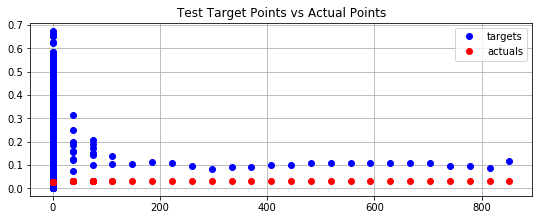

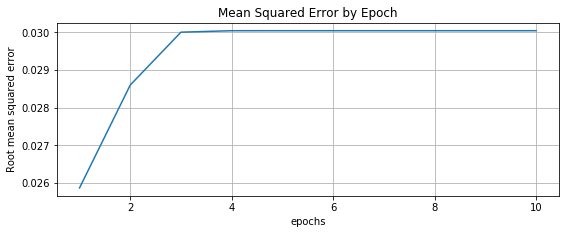

In [205]:
test_positions = [item[0][1] * 1000.0 for item in net.get_test_data()]

all_targets1 = [item[0][0] for item in net.test_targets_activations]
allactuals = [item[1][0] for item in net.test_targets_activations]
plt.figure(figsize=(9,7))
subplot(2, 1, 1)
plot(test_positions, all_targets1, 'bo', label='targets')
plot(test_positions, allactuals, 'ro', label='actuals')
grid(True)
legend(loc='upper right', numpoints=1)
title("Test Target Points vs Actual Points")
show()

plt.figure(figsize=(9,7))
subplot(2, 1, 2)
plot(range(1, len(net.accum_mse) + 1, 1), np.sqrt(net.accum_mse))
xlabel('epochs')
ylabel('Root mean squared error')
grid(True)
title("Mean Squared Error by Epoch")

show()

#   NARX Recurrent Networks

In [206]:
from pyneurgen.recurrent import NARXRecurrent
input_nodes = 10
hidden_nodes = 4
output_nodes = 1

output_order = 3
incoming_weight_from_output = .6
input_order = 2
incoming_weight_from_input = .4

net = NeuralNet()
net.init_layers(input_nodes, [hidden_nodes], output_nodes,
        NARXRecurrent(
            output_order,
            incoming_weight_from_output,
            input_order,
            incoming_weight_from_input))

net.randomize_network()

In [207]:
net.set_all_inputs(all_inputs.values)
net.set_all_targets(all_targets.values)


In [208]:
net.set_learnrate(.1)

In [209]:
length = len(all_inputs)
learn_end_point = int(length * 0.8)

net.set_learn_range(0, learn_end_point)
net.set_test_range(learn_end_point + 1, length - 1)

In [210]:
net.layers[1].set_activation_type('tanh')

In [211]:
net.learn(epochs=10, show_epoch_results=True,random_testing=False)

epoch: 0 MSE: 0.0007213786381240229
epoch: 1 MSE: 0.0007341596537394956
epoch: 2 MSE: 0.0008888671522161664
epoch: 3 MSE: 0.0009967933824804416
epoch: 4 MSE: 0.0010726015788521575
epoch: 5 MSE: 0.0011392100322357883
epoch: 6 MSE: 0.0012028597676239543
epoch: 7 MSE: 0.0012605283593831534
epoch: 8 MSE: 0.0013156278539910406
epoch: 9 MSE: 0.0013642064009523963


In [212]:
mse = net.test()

In [213]:
np.sqrt(mse)

0.07634119032758645

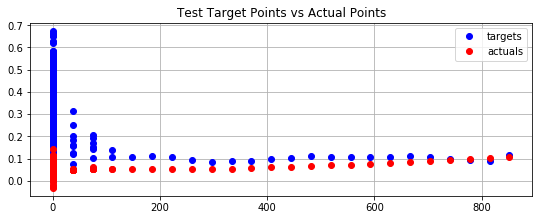

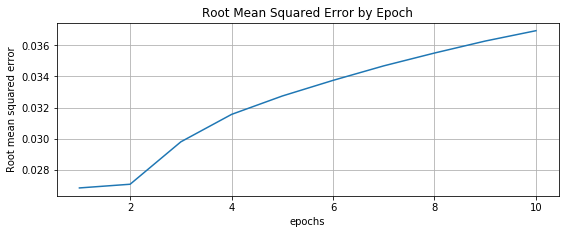

In [214]:
test_positions = [item[0][1] * 1000.0 for item in net.get_test_data()]

all_targets1 = [item[0][0] for item in net.test_targets_activations]
allactuals = [item[1][0] for item in net.test_targets_activations]
plt.figure(figsize=(9,7))
subplot(2, 1, 1)
plot(test_positions, all_targets1, 'bo', label='targets')
plot(test_positions, allactuals, 'ro', label='actuals')
grid(True)
legend(loc='upper right', numpoints=1)
title("Test Target Points vs Actual Points")
show()

plt.figure(figsize=(9,7))
subplot(2, 1, 2)
plot(range(1, len(net.accum_mse) + 1, 1), np.sqrt(net.accum_mse))
xlabel('epochs')
ylabel('Root mean squared error')
grid(True)
title("Root Mean Squared Error by Epoch")

show()

# Elman Simple Recurrent Network 

In [220]:
from pyneurgen.recurrent import ElmanSimpleRecurrent 
input_nodes = 10
hidden_nodes = 4
output_nodes = 1

net = NeuralNet()
net.init_layers(
    input_nodes,
    [hidden_nodes],
    output_nodes,
    ElmanSimpleRecurrent())

net.randomize_network()

In [221]:
net.set_all_inputs(all_inputs.values)
net.set_all_targets(all_targets.values)

In [222]:
net.set_learnrate(.1)

In [232]:
length = len(all_inputs)
learn_end_point = int(length * 0.8)

net.set_learn_range(0, learn_end_point)
net.set_test_range(learn_end_point + 1, length - 1)

In [224]:
net.layers[1].set_activation_type('tanh')

In [225]:
net.learn(epochs=10, show_epoch_results=True,random_testing=False)

epoch: 0 MSE: 0.0005271460915968783
epoch: 1 MSE: 0.0005175121559892204
epoch: 2 MSE: 0.0005411203970275595
epoch: 3 MSE: 0.000575611564156212
epoch: 4 MSE: 0.00062197617937222
epoch: 5 MSE: 0.0006742798521115127
epoch: 6 MSE: 0.000725450873070703
epoch: 7 MSE: 0.0007785805400119963
epoch: 8 MSE: 0.0008488362282299347
epoch: 9 MSE: 0.0009993895465649117


In [226]:
mse = net.test()

In [228]:
np.sqrt(mse)

0.08135182913850295

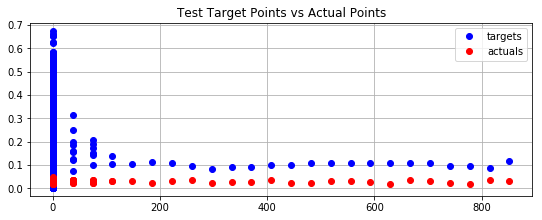

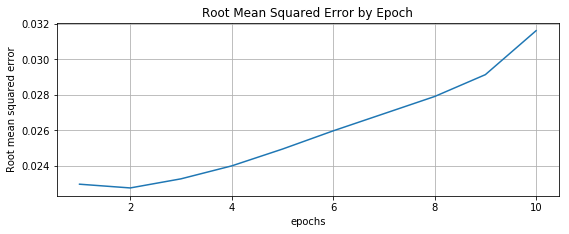

In [229]:
test_positions = [item[0][1] * 1000.0 for item in net.get_test_data()]

all_targets1 = [item[0][0] for item in net.test_targets_activations]
allactuals = [item[1][0] for item in net.test_targets_activations]
plt.figure(figsize=(9,7))
subplot(2, 1, 1)
plot(test_positions, all_targets1, 'bo', label='targets')
plot(test_positions, allactuals, 'ro', label='actuals')
grid(True)
legend(loc='upper right', numpoints=1)
title("Test Target Points vs Actual Points")
show()

plt.figure(figsize=(9,7))
subplot(2, 1, 2)
plot(range(1, len(net.accum_mse) + 1, 1), np.sqrt(net.accum_mse))
xlabel('epochs')
ylabel('Root mean squared error')
grid(True)
title("Root Mean Squared Error by Epoch")

show()

#   Jordan Style Recurrent Network

In [236]:
from pyneurgen.recurrent import JordanRecurrent

input_nodes = 2
hidden_nodes = 2
output_nodes = 1
existing_weight_factor = .7
net = NeuralNet()

net.init_layers(
    input_nodes,
    [hidden_nodes],
    output_nodes,
    JordanRecurrent(existing_weight_factor))

net.randomize_network()

In [237]:
net.set_all_inputs(all_inputs.values)
net.set_all_targets(all_targets.values)

In [238]:
net.set_learnrate(.1)

In [239]:
length = len(all_inputs)
learn_end_point = int(length * 0.8)

net.set_learn_range(0, learn_end_point)
net.set_test_range(learn_end_point + 1, length - 1)

In [240]:
net.layers[1].set_activation_type('tanh')

In [241]:
net.learn(epochs=10, show_epoch_results=True,random_testing=False)

epoch: 0 MSE: 0.0011327074190023868
epoch: 1 MSE: 0.0015343302216213734
epoch: 2 MSE: 0.0016810413701665897
epoch: 3 MSE: 0.0018143277774055853
epoch: 4 MSE: 0.001981917878630827
epoch: 5 MSE: 0.002106651779971453
epoch: 6 MSE: 0.0021963685077640085
epoch: 7 MSE: 0.0022926350961018733
epoch: 8 MSE: 0.0023628475949821937
epoch: 9 MSE: 0.0023617075879759824


In [242]:
mse = net.test()

In [244]:
np.sqrt(mse)

0.07539706491057728

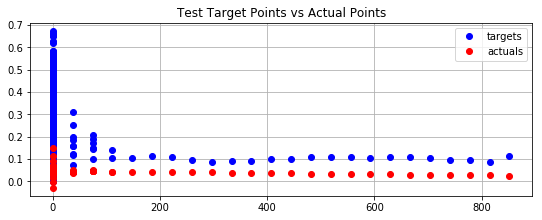

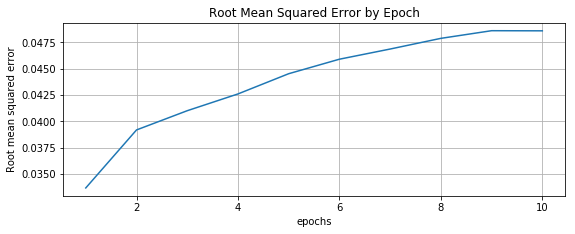

In [245]:
test_positions = [item[0][1] * 1000.0 for item in net.get_test_data()]

all_targets1 = [item[0][0] for item in net.test_targets_activations]
allactuals = [item[1][0] for item in net.test_targets_activations]
plt.figure(figsize=(9,7))
subplot(2, 1, 1)
plot(test_positions, all_targets1, 'bo', label='targets')
plot(test_positions, allactuals, 'ro', label='actuals')
grid(True)
legend(loc='upper right', numpoints=1)
title("Test Target Points vs Actual Points")
show()

plt.figure(figsize=(9,7))
subplot(2, 1, 2)
plot(range(1, len(net.accum_mse) + 1, 1), np.sqrt(net.accum_mse))
xlabel('epochs')
ylabel('Root mean squared error')
grid(True)
title("Root Mean Squared Error by Epoch")

show()